In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("accident.csv")
data.head()

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Local Authority,Vehicle Number,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,58F1730,436147,434957,2,15-08-2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,2,6
1,58F1730,436147,434957,2,15-08-2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,1,9
2,58F1730,436147,434957,2,15-08-2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,2,39
3,58F1730,436147,434957,2,15-08-2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,1,5
4,58F1730,436147,434957,2,15-08-2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,2,8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Reference Number     1907 non-null   object
 1   Grid Ref: Easting    1907 non-null   int64 
 2   Grid Ref: Northing   1907 non-null   int64 
 3   Number of Vehicles   1907 non-null   int64 
 4   Accident Date        1907 non-null   object
 5   Time (24hr)          1907 non-null   int64 
 6   1st Road Class       1907 non-null   int64 
 7   1st Road Class & No  1907 non-null   object
 8   Road Surface         1907 non-null   int64 
 9   Lighting Conditions  1907 non-null   int64 
 10  Weather Conditions   1907 non-null   int64 
 11  Local Authority      1907 non-null   object
 12  Vehicle Number       1907 non-null   int64 
 13  Type of Vehicle      1907 non-null   int64 
 14  Casualty Class       1907 non-null   int64 
 15  Casualty Severity    1907 non-null   int64 
 16  Sex of

In [6]:
print(data.isnull().sum())

Reference Number       0
Grid Ref: Easting      0
Grid Ref: Northing     0
Number of Vehicles     0
Accident Date          0
Time (24hr)            0
1st Road Class         0
1st Road Class & No    0
Road Surface           0
Lighting Conditions    0
Weather Conditions     0
Local Authority        0
Vehicle Number         0
Type of Vehicle        0
Casualty Class         0
Casualty Severity      0
Sex of Casualty        0
Age of Casualty        0
dtype: int64


In [8]:
# Drop rows with missing critical values
data_cleaned = data.dropna(subset=['Weather Conditions', 'Road Surface', 'Time (24hr)'])

# Convert Time to datetime format
data_cleaned['Time (24hr)'] = pd.to_datetime(data_cleaned['Time (24hr)'], errors='coerce').dt.time

# Drop rows where Time conversion failed
data_cleaned = data_cleaned.dropna(subset=['Time (24hr)'])

# Convert categorical variables if necessary
data_cleaned['Casualty Severity'] = data_cleaned['Casualty Severity'].map({'Slight': 0, 'Serious': 1, 'Fatal': 2})


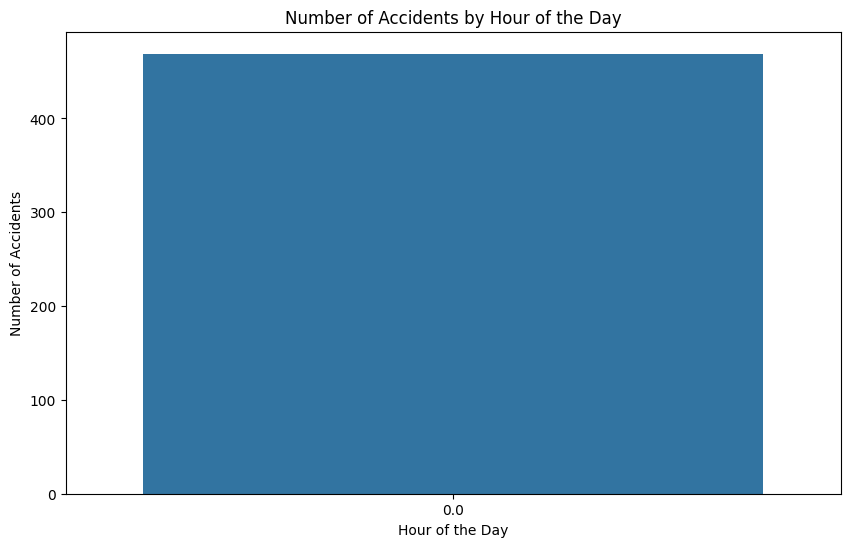

In [9]:
# Extract the hour from the 'Time' column
data_cleaned['Hour'] = pd.to_datetime(data_cleaned['Time (24hr)'], format='%H:%M:%S', errors='coerce').dt.hour

# Plot accidents by hour
plt.figure(figsize=(10,6))
sns.countplot(data=data_cleaned, x='Hour')
plt.title('Number of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

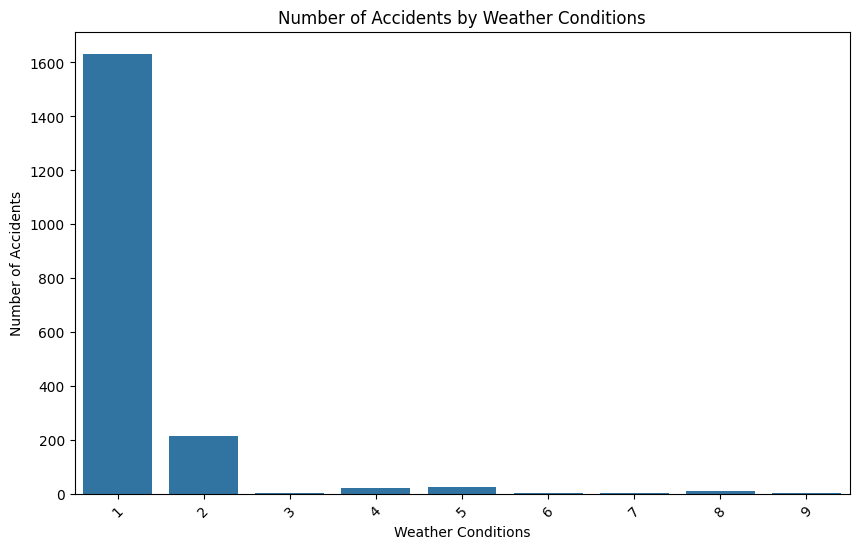

In [11]:
#Accidents by weather conditions
plt.figure(figsize=(10,6))
sns.countplot(data=data_cleaned, x='Weather Conditions')
plt.title('Number of Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

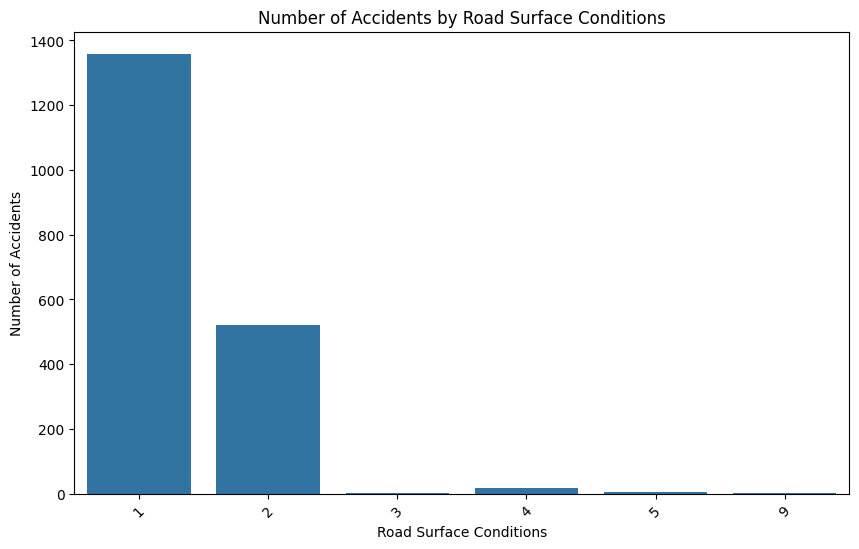

In [12]:
# Accidents by Road Surface Conditions
plt.figure(figsize=(10,6))
sns.countplot(data=data_cleaned, x='Road Surface')
plt.title('Number of Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

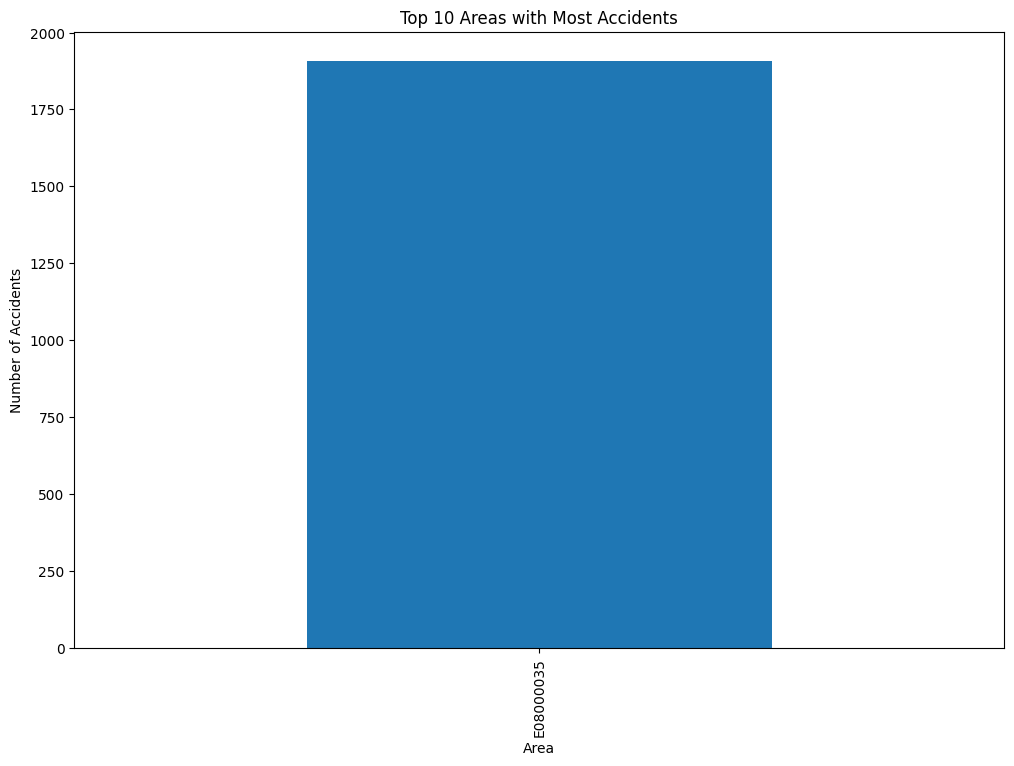

In [13]:
# Plot Accidents by area 
plt.figure(figsize=(12,8))
area_accidents = data_cleaned['Local Authority'].value_counts().head(10)
area_accidents.plot(kind='bar')
plt.title('Top 10 Areas with Most Accidents')
plt.xlabel('Area')
plt.ylabel('Number of Accidents')
plt.show()

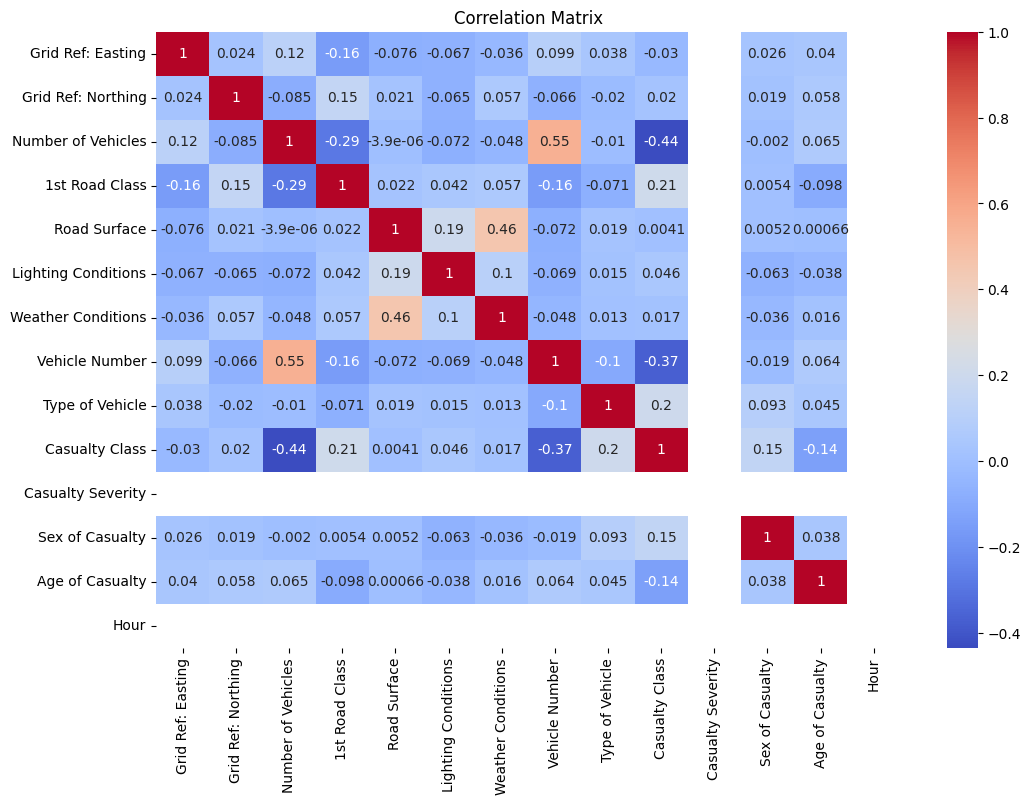

In [15]:
numeric_columns = data_cleaned.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Select features and target variable
features = data[[ 'Weather Conditions', 'Road Surface', 'Lighting Conditions']]
target = data['Casualty Severity']

# Convert categorical features to dummy variables
features = pd.get_dummies(features)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Build a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        98
           3       0.81      1.00      0.89       464

    accuracy                           0.81       573
   macro avg       0.27      0.33      0.30       573
weighted avg       0.66      0.81      0.72       573



C:\Users\sanya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sanya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sanya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo